# Week 14
# Clustering Analysis

**Unsupervised machine learning** is the machine learning task of inferring a function to describe hidden structure from "unlabeled" data. A typical example of unsupervised learning is **Clustering analysis**, which aims at grouping the data in such a way that instances in the same group are more similar to each other than to those in other groups.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

(100, 2)


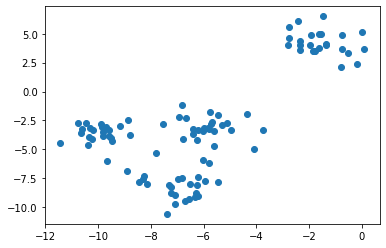

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=4, random_state=1)

print(X.shape)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

## Applications of Clustering

- Geographical clustering to decide where to build signal towers, hospitals, restaurants, etc.
- Social network clustering to discover communities
- Recommendation system clustering: "people who likes xxx also like yyy ..."
- Market segmentation: customer groups
- Organize computing clusters: reduce data throughput
- Feature extraction

## K-Means Algorithm

**Input:**
- $K$: number of clusters
- Training set $\{x^{(1)}, x^{(2)},..., x^{(m)}\}\subseteq\mathbb{R}^n$

**Computation:**
1. Randomly initialize $K$ cluster centroids $\mu_1, \mu_2, ..., \mu_K\in\mathbb{R}^n$
2. Repeat:
    1. for $i=1$ to $m$ do
        - $c^{(i)}\leftarrow $ index of cluster centroid closest to $x^{(i)}$
    2. for $k=1$ to $K$ do
        - $\mu_k\leftarrow $ average of points assigned to cluster $k$.

**Remarks:**
1. The number of clusters is determined before the algorithm.
2. Data normalization is necessary.
3. It can happen that no points get assigned to a cluster, the cluster will then be removed.
4. Initailization affects the clustering results.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/K-means_convergence.gif/247px-K-means_convergence.gif" width="400">

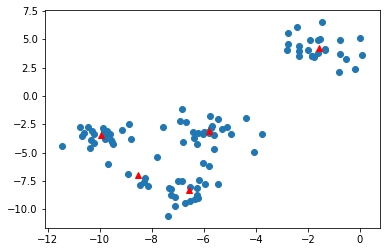

In [3]:
from sklearn.cluster import KMeans
model_km = KMeans(n_clusters=5, random_state=0)
model_km.fit(X)
plt.plot(model_km.cluster_centers_[:, 0], model_km.cluster_centers_[:, 1], 'r^')
plt.scatter(X[:, 0], X[:, 1])

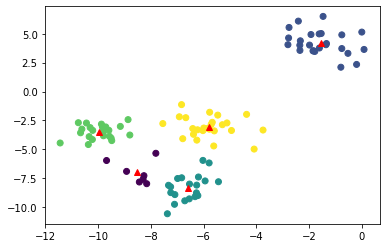

In [4]:
# Split the data into groups
plt.scatter(X[:, 0], X[:, 1], c=model_km.predict(X))
plt.plot(model_km.cluster_centers_[:, 0], model_km.cluster_centers_[:, 1], 'r^')

## K-Means Optimization Objective
$$J(c^{(1)}, ..., c^{(m)}, \mu_1, ..., \mu_K) = \frac{1}{m}\sum_{i=1}^m\|x^{(i)} - \mu_{c^{(i)}}\|^2$$

- The first step in the k-means algorithm finds
$$\min_{c^{(1)}, ..., c^{(m)}}J(c^{(1)}, ..., c^{(m)}, \mu_1, ..., \mu_K)$$
- The second step in the k-means algorithm finds
$$\min_{\mu_1, ..., \mu_K}J(c^{(1)}, ..., c^{(m)}, \mu_1, ..., \mu_K)$$
- The hope is that by minimizing over the two subsets of variables, the results may converge to 
$$\min_{c^{(1)}, ..., c^{(m)}, \mu_1, ..., \mu_K}J(c^{(1)}, ..., c^{(m)}, \mu_1, ..., \mu_K)$$

## Initialization Strategy

K-means algorithm may be trapped at a local optimum:

<img src="https://www.holehouse.org/mlclass/13_Clustering_files/Image%20[10].png" width="600">



- Multiple random Initialization: `KMeans` from `sklean` will try 10 initializations by default.
- **K-Means++**: greedily add farthest away point (this may take longer than the clustering)

## Choosing the Number of Clusters

- **Elbow method:**

<img src="https://miro.medium.com/max/1818/1*aI_dkLIlXW9EvpYjYcA8iQ.png" width="500">

- Sometimes, the purpose of k-means clustering is to perform some downstream task. In that case, it is natural to use the nature of the downstream task as a criterion for choosing the number of clusters.


## Limitation of K-Means: 

- The decision regions are formed by boundaries that are equidistant to two cluster centers (Voronoi-Diagrams).

<img src="https://freakonometrics.hypotheses.org/files/2015/02/k-means-5-groups-1-version-1-4.png" width="500">

- Straight-forward implementation requires $O(mnK)$ computations per iteration. 

## Agglomerative Clustering
- Start with all points in their own cluster
- Greedily merge the two most similar clusters. (What is the criterion?)
- Fast with sparse connectivity, otherwise $O(m^2\log(m))$

<img src="https://3.bp.blogspot.com/-TQYHVkgesMg/WbTcMIOuquI/AAAAAAAAD3Y/dY4YpxJ3OhU5VGppwcrS6j-ewvlddxSjwCLcBGAs/s1600/hcust.PNG" width="600">

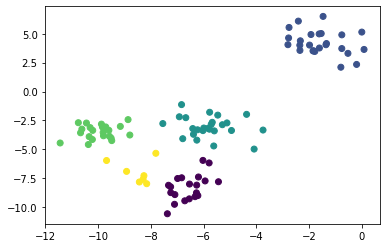

In [5]:
from sklearn.cluster import AgglomerativeClustering
model_ac = AgglomerativeClustering(n_clusters=5)
model_ac.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=model_ac.labels_)

In [6]:
model_ac.children_

array([[ 75,  86],
       [ 69,  87],
       [ 88, 100],
       [ 37,  96],
       [ 56,  57],
       [ 23,  74],
       [ 89, 105],
       [ 20,  44],
       [ 31,  72],
       [ 43,  62],
       [ 17,  34],
       [ 25,  84],
       [  8,  64],
       [ 15,  54],
       [ 82,  95],
       [  6,  10],
       [ 46,  48],
       [ 11,  99],
       [ 33,  76],
       [  1,  70],
       [ 21,  40],
       [ 53,  80],
       [  9,  77],
       [103, 113],
       [ 59,  98],
       [ 14,  27],
       [ 28,  47],
       [ 36, 107],
       [ 63, 109],
       [ 30,  32],
       [ 94, 106],
       [ 71, 120],
       [ 16,  41],
       [ 52, 101],
       [ 19, 102],
       [  2,  39],
       [ 78, 123],
       [ 67, 128],
       [ 18, 129],
       [ 45,  49],
       [ 68, 112],
       [ 13,  97],
       [ 29,  90],
       [118, 126],
       [ 58, 131],
       [ 24,  79],
       [ 35,  61],
       [ 38, 119],
       [  3,  93],
       [121, 130],
       [111, 115],
       [ 22, 116],
       [ 85,

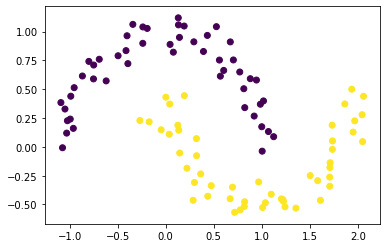

In [7]:
from sklearn.datasets import make_moons
X_moon, y_moon = make_moons(100, noise=0.1)
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_moon)

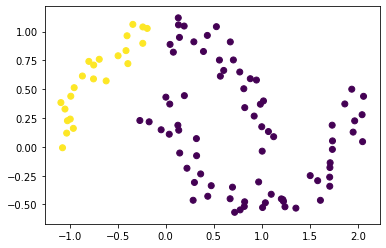

In [16]:
model_ac2 = AgglomerativeClustering(n_clusters=2,
                                    linkage="single")
model_ac2.fit(X_moon)
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=model_ac2.labels_)

## DBSCAN

- DBSCAN: Density-Based Spatial Clustering of Applications with Noise
- Finds core samples of high density and expands clusters from them. 
- Good for data which contains clusters of similar density.

<img src="https://dashee87.github.io/images/DBSCAN_search.gif" width="500">

Referece:
    <a href="https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/">Clustering with Scikit with GIFs</a>

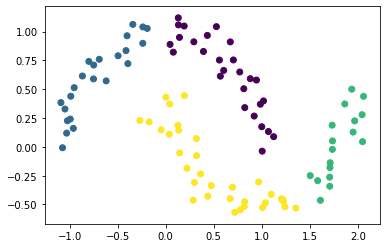

In [23]:
from sklearn.cluster import DBSCAN
model_db = DBSCAN(eps=0.25)
model_db.fit(X_moon)
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=model_db.labels_)

## Comparing Different Clustering Algorithms

<img src="https://scikit-learn.org/dev/_images/sphx_glr_plot_cluster_comparison_001.png" width="800">

## Clustering as Feature Extraction

<a href="https://medium.com/datadriveninvestor/k-means-clustering-for-imagery-analysis-56c9976f16b6">K Means Clustering for Imagery Analysis</a>